# Product Recommendations using Transfer Learning

Online shopping websites always suggest items similar to the ones you have browsed and sometimes even items that can go with it. This notebook is a basic replication of the product recommendations using cosine image similarity. This topic falls majorly in the domain of Recommendation sytems and deep learning.
We have to be smarter about the way we use our resources in solving Deep Learning problems. Especially so, when we try to solve complex real life problems on areas like image and voice recognition. Once you have a few hidden layers in your model, adding another layer of hidden layer would need immense resources.

Thankfully, there is something called “Transfer Learning” which enables us to use pre-trained models by making small changes. In this implementation, we simply remove the outermost.i.e softmax layer for feature extraction and use the outputs of the Dense layer as features.


In the next cell,all necessary libraries are imported. For feature extraction, we use the VGG16 model. Any transfer learning model like ResNet50, Inception or the MLP model.

In [2]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [21]:
#Specify the directory where the images are stored

imgs_path = "C:/Users/hp/Desktop/data/"

#Note the image height and width. It is set according to the shape of the model's first input layer. 
#In VGG16, the shape is (none,224,224,3)
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5

In [23]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpeg" in x]

print("Total number of images:",len(files))

#files

Total number of images: 52


**Let's test the feature extraction for one random image!**

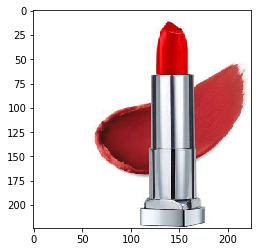

Test image loaded successfully!


In [5]:
original = load_img(files[47], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Test image loaded successfully!")

Load the model and define the feature extractor by simply removing the last layer or setting the desired layer as output.

In [9]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

553467904/553467096 [==============================] - 2431s 4us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2

In [34]:
#Save the model so you dont have to load the model everytime and make it less cumbersome.
vgg_model.save('C:/Users/hp/Desktop/flipkart_data/model')

In [24]:
#Load the saved model

from tensorflow import keras
from tensorflow.keras.models import Model

vgg_model = keras.models.load_model('C:/Users/hp/Desktop/flipkart_data/model')

feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
numpy_image = img_to_array(original)
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [10]:
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.       , 0.       , 0.       , ..., 4.1524076, 0.       ,
        4.2171903]], dtype=float32)

Therefore, the features are extracted for one image. Lets implement it for the total data now!

In [25]:
importedImages = []
#Same procs, created imagebatch and preprocess the images
for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [26]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(52, 4096)

## Cosine Similarity


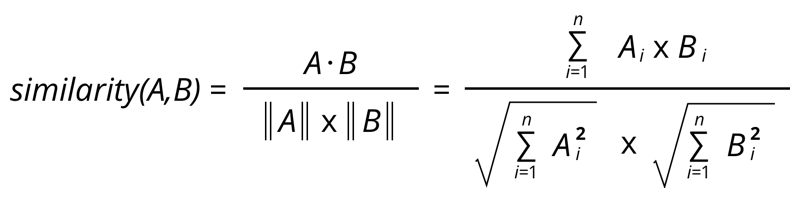

Cosine similarity is the cosine of the angle between two n-dimensional vectors in an n-dimensional space. It is the dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes).
It is often used as a measure in recommendation systems.

In [13]:
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,C:/Users/hp/Desktop/data/a.jpeg,C:/Users/hp/Desktop/data/aa.jpeg,C:/Users/hp/Desktop/data/ab.jpeg,C:/Users/hp/Desktop/data/ac.jpeg,C:/Users/hp/Desktop/data/ad.jpeg,C:/Users/hp/Desktop/data/ae.jpeg,C:/Users/hp/Desktop/data/af.jpeg,C:/Users/hp/Desktop/data/ag.jpeg,C:/Users/hp/Desktop/data/ah.jpeg,C:/Users/hp/Desktop/data/ai.jpeg,...,C:/Users/hp/Desktop/data/q.jpeg,C:/Users/hp/Desktop/data/r.jpeg,C:/Users/hp/Desktop/data/s.jpeg,C:/Users/hp/Desktop/data/t.jpeg,C:/Users/hp/Desktop/data/u.jpeg,C:/Users/hp/Desktop/data/v.jpeg,C:/Users/hp/Desktop/data/w.jpeg,C:/Users/hp/Desktop/data/x.jpeg,C:/Users/hp/Desktop/data/y.jpeg,C:/Users/hp/Desktop/data/z.jpeg
C:/Users/hp/Desktop/data/a.jpeg,1.000000,0.173618,0.219127,0.268794,0.259308,0.240488,0.283139,0.261678,0.322359,0.185839,...,0.144087,0.119810,0.142365,0.136753,0.189934,0.307095,0.279953,0.226133,0.326389,0.373681
C:/Users/hp/Desktop/data/aa.jpeg,0.173618,1.000000,0.845621,0.693853,0.658575,0.739836,0.359246,0.420970,0.436540,0.432671,...,0.224999,0.218297,0.282588,0.272182,0.119901,0.131000,0.156248,0.126899,0.176856,0.233139
C:/Users/hp/Desktop/data/ab.jpeg,0.219127,0.845621,1.000000,0.813723,0.675025,0.724370,0.355554,0.413203,0.421042,0.380753,...,0.248573,0.243776,0.325016,0.283167,0.148045,0.144180,0.164757,0.159793,0.244480,0.295607
C:/Users/hp/Desktop/data/ac.jpeg,0.268794,0.693853,0.813723,1.000000,0.706160,0.729724,0.268179,0.337625,0.319619,0.261556,...,0.277186,0.251572,0.317563,0.306005,0.202526,0.165165,0.202764,0.228542,0.260722,0.317547
C:/Users/hp/Desktop/data/ad.jpeg,0.259308,0.658575,0.675025,0.706160,1.000000,0.691537,0.255922,0.369420,0.366569,0.331475,...,0.317657,0.291134,0.355942,0.351129,0.180555,0.176194,0.201602,0.210740,0.280491,0.302123


Now that the features are extracted and the utility matrix is obtained, we need a function for getting similar products.Lets write some code for it.

In [27]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    #print(closest_imgs)
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


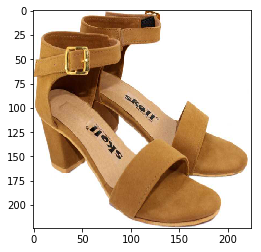

-----------------------------------------------------------------------
most similar products:


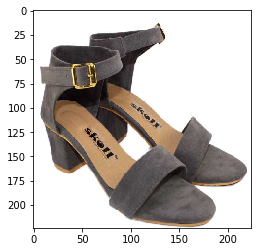

similarity score :  0.8629984


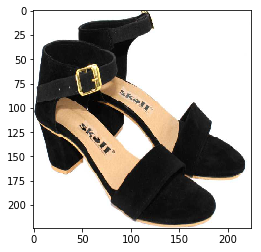

similarity score :  0.8147823


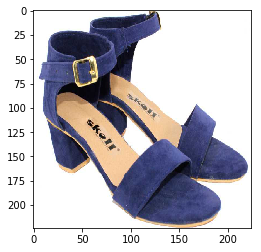

similarity score :  0.7974927


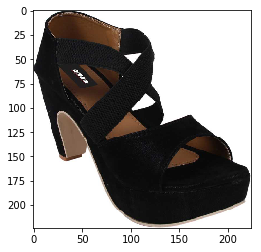

similarity score :  0.6952332


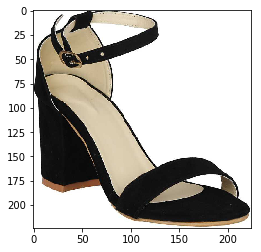

similarity score :  0.57334536


In [31]:
retrieve_most_similar_products(files[0])

-----------------------------------------------------------------------
original product:


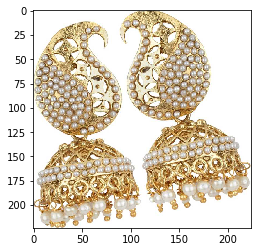

-----------------------------------------------------------------------
most similar products:


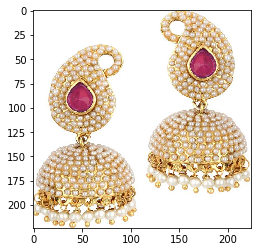

similarity score :  0.79402864


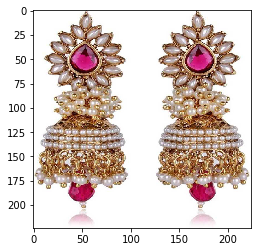

similarity score :  0.5981834


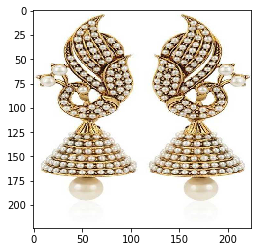

similarity score :  0.4923573


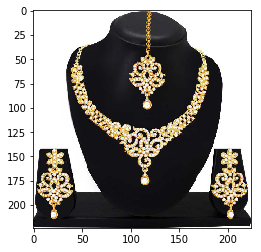

similarity score :  0.42097038


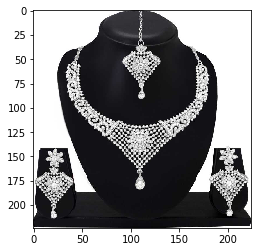

similarity score :  0.41320255


In [25]:
retrieve_most_similar_products(files[7])

# Conclusion

Therefore, a product recommendation system using the VGG16 model is implemented and it provides pretty good results when tested. Although the data used here is small because of computing limitations, the model performs better with a large amount of data. Hyperparameters tuning can enhance the accuracy even more. The model has real-life applications in e-commerce websites and also can be used for curating products for a specific user.